In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import sys
import getpass
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

from metric_learn import NCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from tqdm import tqdm

username = getpass.getuser()
sys.path.append(f'../')

from src.support_models import MetricLearner

In [46]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=300, n_features=768, n_informative=50,
                           n_classes=4, n_clusters_per_class=5, random_state=0)

X.shape, Y.shape

((300, 768), (300,))

# Fits and plots

In [47]:
def scatter(x, labels, title, subtitle=None):
    palette = np.array(sns.color_palette("hls", 4))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0,alpha = 0.5, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.title(title)

(300, 2) (300,)


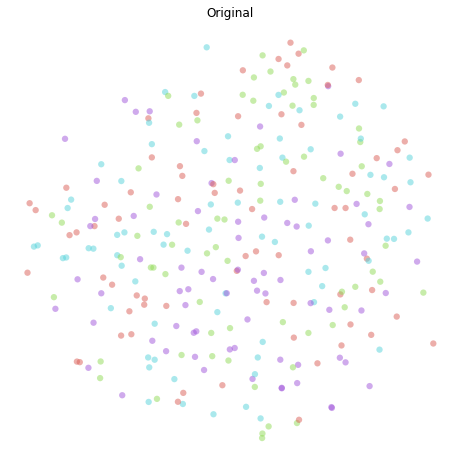

In [48]:
tsne = TSNE()
X_orig = tsne.fit_transform(X)
print(X_orig.shape, Y.shape)
scatter(X_orig, Y, 'Original')

with: 0.3333333333333333
without: 0.35666666666666663


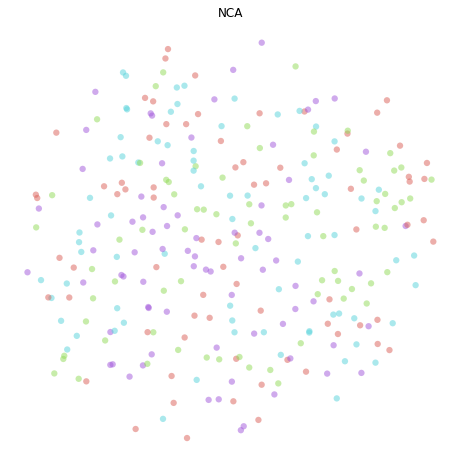

In [49]:
mlearner = MetricLearner('NCA')
X_transformed = mlearner.fit_transform(X, Y)

tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_transformed)
except ValueError as e:
    print(mltool_name, e)
#print(X_reduced.shape, Y.shape)

clf = make_pipeline(MetricLearner('NCA'), KNeighborsClassifier())
print('with:', cross_val_score(clf, X, Y).mean())

clf = KNeighborsClassifier()
print('without:', cross_val_score(clf, X, Y).mean())

scatter(X_reduced, Y, "NCA")

/home/kaigorodov/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 15s 654ms/step - loss: 1.1735
Epoch 2/10
20/20 [==============================] - 13s 636ms/step - loss: 0.2354
Epoch 3/10
20/20 [==============================] - 13s 650ms/step - loss: 0.0733
Epoch 4/10
20/20 [==============================] - 13s 650ms/step - loss: 0.0358
Epoch 5/10
20/20 [==============================] - 13s 658ms/step - loss: 0.0262
Epoch 6/10
20/20 [==============================] - 13s 645ms/step - loss: 0.0205
Epoch 7/10
20/20 [==============================] - 13s 655ms/step - loss: 0.0177
Epoch 8/10
20/20 [==============================] - 13s 630ms/step - loss: 0.0147
Epoch 9/10
20/20 [==============================] - 13s 643ms/step - loss: 0.0137
Epoch 10/10
20/20 [==============================] - 13s 645ms/step - loss: 0.0133
without: 0.21333333333333332
without: 0.35666666666666663


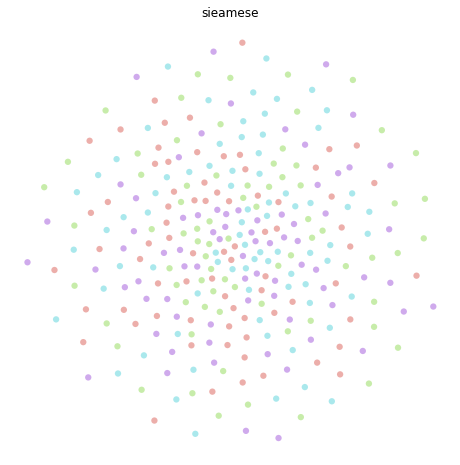

In [51]:
mlearner = MetricLearner('sieamese')
X_transformed = mlearner.fit_transform(X, Y)

tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_transformed)
except ValueError as e:
    print(mltool_name, e)
#print(X_reduced.shape, Y.shape)

# clf = make_pipeline(MetricLearner('sieamese'), KNeighborsClassifier())
# print('with:', cross_val_score(clf, X, Y).mean())

clf = KNeighborsClassifier()
print('without:', cross_val_score(clf, X_transformed, Y).mean())

clf = KNeighborsClassifier()
print('without:', cross_val_score(clf, X, Y).mean())

scatter(X_reduced, Y, "sieamese")